# **Library and Dataset Imports**

In [22]:
# !pip uninstall -y catboost
#!pip install catboost

In [23]:
#!pip install Cython
# !pip install pymrmr --use-pep517

In [24]:
!pip install -q catboost

try:
    import catboost
    print("catboost imported successfully!")
except ImportError:
    print("catboost not found.")

catboost imported successfully!


In [25]:
import os
import subprocess

# Set the environment variables using the paths from your output
os.environ["CC"] = "/opt/homebrew/Cellar/gcc/14.2.0_1/bin/gcc-14"

# Check if g++-14 exists in the same directory
result = subprocess.run(["ls", "-la", "/opt/homebrew/Cellar/gcc/14.2.0_1/bin/"], 
                       capture_output=True, text=True)
# print("Available binaries in gcc directory:")
# print(result.stdout)

# Set CXX to g++-14 if it exists, otherwise we'll need another approach
if "g++-14" in result.stdout:
    os.environ["CXX"] = "/opt/homebrew/Cellar/gcc/14.2.0_1/bin/g++-14"
    #print(f"CXX set to: {os.environ.get('CXX')}")
else:
    print("g++-14 not found in the expected directory!")
    
# Verify the environment variables
#print(f"CC set to: {os.environ.get('CC')}")

# Try pip install with the new compiler
!pip install -q --upgrade pymrmr

try:
    import pymrmr
    print("pymrmr imported successfully!")
    print("Version: ", pymrmr.__version__)
except ImportError:
    print("pymrmr not found.")

pymrmr imported successfully!
Version:  0.1.1


In [26]:
!pip install -q imbalanced-learn
!pip install -q seaborn
!pip install -q kagglehub
!pip install -q xgboost

try:
    import imblearn
    print("imbalanced-learn imported successfully!")
except ImportError:
    print("imbalanced-learn not found.")

try:
    import seaborn
    print("seaborn imported successfully!")
except ImportError:
    print("seaborn not found.")

try:
    import kagglehub
    print("kagglehub imported successfully!")
except ImportError:
    print("kagglehub not found.")

try:
    import xgboost
    print("xgboost imported successfully!")
except ImportError:
    print("xgboost not found.")


imbalanced-learn imported successfully!
seaborn imported successfully!
kagglehub imported successfully!
xgboost imported successfully!


In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import kagglehub
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score, precision_score, recall_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
import pymrmr
from imblearn.over_sampling import ADASYN

In [28]:
# Code to update kagglehub (uncomment if needed)
#!pip install --upgrade kagglehub

In [29]:
path = kagglehub.dataset_download("luzrello/dyslexia")

df_desktop = pd.read_csv(path + "/Dyt-desktop.csv", delimiter=';')
df_desktop

,Gender,Nativelang,Otherlang,Age,Clicks1,Hits1,Misses1,Score1,Accuracy1,Missrate1,...,Score31,Accuracy31,Missrate31,Clicks32,Hits32,Misses32,Score32,Accuracy32,Missrate32,Dyslexia
0,Male,No,Yes,7,10,10,0,10,1.0,0.0,...,0,0.000000,0.00,17,2,0,2,0.117647,0.000000,No
1,Female,Yes,Yes,13,12,12,0,12,1.0,0.0,...,4,0.114286,0.00,26,2,2,2,0.076923,0.076923,Yes
2,Female,No,Yes,7,6,6,0,6,1.0,0.0,...,4,0.114286,0.00,26,1,3,1,0.038462,0.115385,No
3,Female,No,Yes,7,0,0,0,0,0.0,0.0,...,0,0.000000,0.00,1,0,0,0,0.000000,0.000000,No
4,Female,No,Yes,8,4,4,0,4,1.0,0.0,...,1,25.000000,0.05,26,2,2,2,0.076923,0.076923,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3639,Male,No,No,10,7,7,0,7,1.0,0.0,...,2,0.670000,0.33,4,1,3,1,0.250000,0.750000,Yes
3640,Female,No,Yes,15,9,9,0,9,1.0,0.0,...,3,0.750000,0.25,4,2,2,2,0.500000,0.500000,No
3641,Female,No,Yes,15,11,11,0,11,1.0,0.0,...,3,0.600000,0.40,4,2,2,2,0.500000,0.500000,No
3642,Female,No,Yes,15,10,10,0,10,1.0,0.0,...,3,0.750000,0.25,4,3,1,3,0.750000,0.250000,No


In [30]:
df_tablet = pd.read_csv(path + "/Dyt-tablet.csv", delimiter=';')
df_tablet

,Gender,Nativelang,Otherlang,Age,Clicks1,Hits1,Misses1,Score1,Accuracy1,Missrate1,...,Score31,Accuracy31,Missrate31,Clicks32,Hits32,Misses32,Score32,Accuracy32,Missrate32,Dyslexia
0,Male,Yes,No,7,6,6,0,6,1.00,0.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No
1,Female,Yes,No,7,7,7,0,7,1.00,0.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No
2,Female,Yes,No,7,6,6,0,6,1.00,0.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No
3,Male,Yes,No,7,5,5,0,5,1.00,0.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No
4,Male,Yes,No,7,8,6,2,8,0.75,0.25,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1390,Male,Yes,No,17,13,13,0,13,1.00,0.00,...,35.0,0.114286,0.0,26.0,4.0,0.0,26.0,0.153846,0.000000,No
1391,Female,Yes,Yes,17,9,9,0,9,1.00,0.00,...,35.0,0.114286,0.0,26.0,4.0,0.0,26.0,0.153846,0.000000,No
1392,Male,Yes,Yes,17,10,10,0,10,1.00,0.00,...,35.0,0.114286,0.0,27.0,3.0,2.0,27.0,0.111111,0.074074,No
1393,Female,Yes,Yes,17,11,11,0,11,1.00,0.00,...,35.0,0.114286,0.0,26.0,4.0,0.0,26.0,0.153846,0.000000,No


# **Data Preprocessing and Preparation**

In [31]:
print(df_desktop.info())
print()
print(df_tablet.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3644 entries, 0 to 3643
Columns: 197 entries, Gender to Dyslexia
dtypes: float64(64), int64(129), object(4)
memory usage: 5.5+ MB
None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1395 entries, 0 to 1394
Columns: 197 entries, Gender to Dyslexia
dtypes: float64(128), int64(65), object(4)
memory usage: 2.1+ MB
None


In [32]:
print(df_desktop.select_dtypes(include=['number']).describe())
print(df_desktop.select_dtypes(include=['object']).describe())
print()
print("=" * 100)
print()
print(df_tablet.select_dtypes(include=['number']).describe())
print(df_tablet.select_dtypes(include=['object']).describe())

               Age      Clicks1        Hits1      Misses1       Score1  \
count  3644.000000  3644.000000  3644.000000  3644.000000  3644.000000   
mean     10.484907     6.104281     3.683315     0.794731     3.748079   
std       2.478132     4.473068     4.194311     1.191338     4.172533   
min       7.000000     0.000000     0.000000     0.000000     0.000000   
25%       8.750000     3.000000     0.000000     0.000000     0.000000   
50%      10.000000     5.000000     1.000000     0.000000     1.000000   
75%      12.000000     8.000000     7.000000     1.000000     7.000000   
max      17.000000    84.000000    19.000000    18.000000    19.000000   

         Accuracy1    Missrate1      Clicks2        Hits2      Misses2  ...  \
count  3644.000000  3644.000000  3644.000000  3644.000000  3644.000000  ...   
mean      3.047372     4.541253     9.547475     4.844951     0.888310  ...   
std      35.446814    40.329119     5.462742     3.699285     1.829512  ...   
min       0.00000

In [33]:
# Missing values
print(df_desktop.isnull().sum())
print()
print("=" * 100)
print()
print(df_tablet.isnull().sum())

Gender        0
Nativelang    0
Otherlang     0
Age           0
Clicks1       0
             ..
Misses32      0
Score32       0
Accuracy32    0
Missrate32    0
Dyslexia      0
Length: 197, dtype: int64


Gender          0
Nativelang      0
Otherlang       0
Age             0
Clicks1         0
             ... 
Misses32      897
Score32       897
Accuracy32    896
Missrate32    896
Dyslexia        0
Length: 197, dtype: int64


In [34]:
# Check the percentage of missing values for each column
missing_percentages = df_desktop.isnull().mean() * 100

# Filter columns with missing values
missing_percentages = missing_percentages[missing_percentages > 0]

# Sort the results in descending order
missing_percentages = missing_percentages.sort_values(ascending=False)

pd.set_option('display.max_rows', None)
# Display the percentages
print(missing_percentages)

pd.reset_option('display.max_rows')

Series([], dtype: float64)


In [35]:
# Check the percentage of missing values for each column
missing_percentages = df_tablet.isnull().mean() * 100

# Filter columns with missing values
missing_percentages = missing_percentages[missing_percentages > 0]

# Sort the results in descending order
missing_percentages = missing_percentages.sort_values(ascending=False)

pd.set_option('display.max_rows', None)
# Display the percentages
print(missing_percentages)

pd.reset_option('display.max_rows')

Missrate29    100.000000
Accuracy29    100.000000
Hits29        100.000000
Misses29      100.000000
Score29       100.000000
Clicks29      100.000000
Clicks32       64.301075
Misses31       64.301075
Hits31         64.301075
Clicks31       64.301075
Hits32         64.301075
Misses32       64.301075
Score32        64.301075
Score31        64.301075
Clicks25       64.229391
Misses25       64.229391
Accuracy25     64.229391
Score25        64.229391
Missrate21     64.229391
Hits25         64.229391
Missrate25     64.229391
Score21        64.229391
Accuracy31     64.229391
Missrate31     64.229391
Accuracy32     64.229391
Accuracy21     64.229391
Missrate32     64.229391
Misses21       64.229391
Clicks21       64.229391
Hits21         64.229391
Score28        23.655914
Misses28       23.655914
Hits28         23.655914
Clicks28       23.655914
Clicks20       23.584229
Score27        23.584229
Score20        23.584229
Hits27         23.584229
Clicks27       23.584229
Score26        23.584229


In [36]:
# Drop all columns with 100% missing values
df_tablet = df_tablet.dropna(axis=1, how='all')

# Display the updated DataFrame
print(df_tablet)

      Gender Nativelang Otherlang  Age  Clicks1  Hits1  Misses1  Score1  \
0       Male        Yes        No    7        6      6        0       6   
1     Female        Yes        No    7        7      7        0       7   
2     Female        Yes        No    7        6      6        0       6   
3       Male        Yes        No    7        5      5        0       5   
4       Male        Yes        No    7        8      6        2       8   
...      ...        ...       ...  ...      ...    ...      ...     ...   
1390    Male        Yes        No   17       13     13        0      13   
1391  Female        Yes       Yes   17        9      9        0       9   
1392    Male        Yes       Yes   17       10     10        0      10   
1393  Female        Yes       Yes   17       11     11        0      11   
1394  Female        Yes        No   17        9      9        0       9   

      Accuracy1  Missrate1  ...  Score31  Accuracy31  Missrate31  Clicks32  \
0          1.00      

In [37]:
# Check the percentage of missing values for each column
missing_percentages = df_tablet.isnull().mean() * 100

# Filter columns with missing values
missing_percentages = missing_percentages[missing_percentages > 0]

# Sort the results in descending order
missing_percentages = missing_percentages.sort_values(ascending=False)

pd.set_option('display.max_rows', None)
# Display the percentages
print(missing_percentages)

pd.reset_option('display.max_rows')

Score31       64.301075
Score32       64.301075
Misses32      64.301075
Hits32        64.301075
Clicks32      64.301075
Misses31      64.301075
Hits31        64.301075
Clicks31      64.301075
Hits25        64.229391
Score21       64.229391
Accuracy21    64.229391
Missrate21    64.229391
Clicks25      64.229391
Missrate32    64.229391
Clicks21      64.229391
Misses25      64.229391
Score25       64.229391
Accuracy25    64.229391
Misses21      64.229391
Hits21        64.229391
Missrate25    64.229391
Accuracy32    64.229391
Missrate31    64.229391
Accuracy31    64.229391
Clicks28      23.655914
Hits28        23.655914
Misses28      23.655914
Score28       23.655914
Score26       23.584229
Hits26        23.584229
Misses26      23.584229
Score24       23.584229
Misses24      23.584229
Hits24        23.584229
Clicks24      23.584229
Misses20      23.584229
Score20       23.584229
Clicks27      23.584229
Hits27        23.584229
Misses27      23.584229
Score27       23.584229
Clicks20      23

Desktop Target Distribution:
Dyslexia
No     89.242591
Yes    10.757409
Name: proportion, dtype: float64


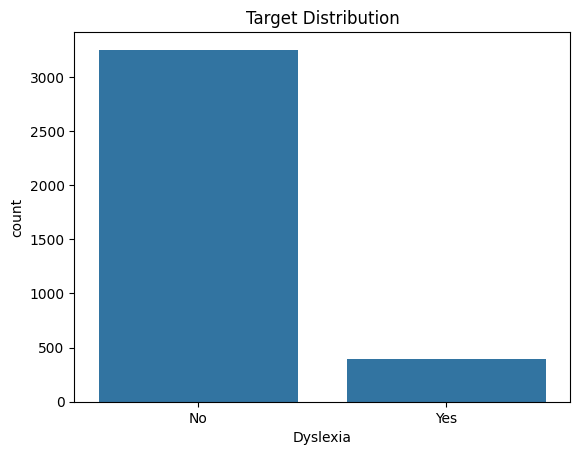


Tablet Target Distribution:
Dyslexia
No     89.390681
Yes    10.609319
Name: proportion, dtype: float64


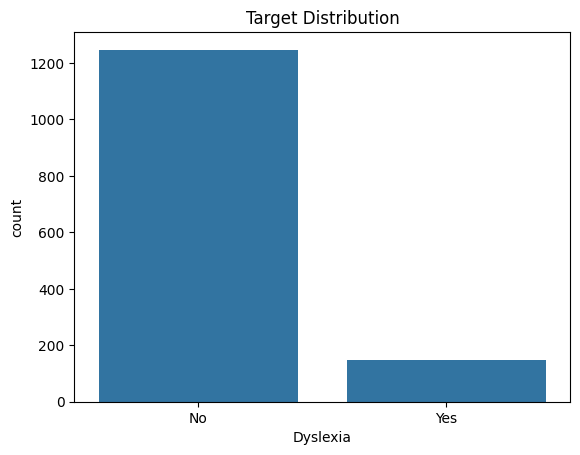

In [38]:
# Checking output label imbalance
target_column = "Dyslexia"

print("Desktop Target Distribution:")
print(f"{df_desktop[target_column].value_counts(normalize=True) * 100}")
sns.countplot(x=df_desktop[target_column])
plt.title("Target Distribution")
plt.show()
print()
print("Tablet Target Distribution:")
print(f"{df_tablet[target_column].value_counts(normalize=True) * 100}")
sns.countplot(x=df_tablet[target_column])
plt.title("Target Distribution")
plt.show()

Clearly, there is a huge imbalance in the positive and negative classes.

Stratified KFold to be used.

In [39]:
from sklearn.preprocessing import LabelEncoder

categorical_cols = df_desktop.select_dtypes(include=["object"]).columns
for col in categorical_cols:
    print(f"Encoding column: {col}")
    le = LabelEncoder()
    df_desktop[col] = le.fit_transform(df_desktop[col])
df_desktop

Encoding column: Gender
Encoding column: Nativelang
Encoding column: Otherlang
Encoding column: Dyslexia


,Gender,Nativelang,Otherlang,Age,Clicks1,Hits1,Misses1,Score1,Accuracy1,Missrate1,...,Score31,Accuracy31,Missrate31,Clicks32,Hits32,Misses32,Score32,Accuracy32,Missrate32,Dyslexia
0,1,0,1,7,10,10,0,10,1.0,0.0,...,0,0.000000,0.00,17,2,0,2,0.117647,0.000000,0
1,0,1,1,13,12,12,0,12,1.0,0.0,...,4,0.114286,0.00,26,2,2,2,0.076923,0.076923,1
2,0,0,1,7,6,6,0,6,1.0,0.0,...,4,0.114286,0.00,26,1,3,1,0.038462,0.115385,0
3,0,0,1,7,0,0,0,0,0.0,0.0,...,0,0.000000,0.00,1,0,0,0,0.000000,0.000000,0
4,0,0,1,8,4,4,0,4,1.0,0.0,...,1,25.000000,0.05,26,2,2,2,0.076923,0.076923,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3639,1,0,0,10,7,7,0,7,1.0,0.0,...,2,0.670000,0.33,4,1,3,1,0.250000,0.750000,1
3640,0,0,1,15,9,9,0,9,1.0,0.0,...,3,0.750000,0.25,4,2,2,2,0.500000,0.500000,0
3641,0,0,1,15,11,11,0,11,1.0,0.0,...,3,0.600000,0.40,4,2,2,2,0.500000,0.500000,0
3642,0,0,1,15,10,10,0,10,1.0,0.0,...,3,0.750000,0.25,4,3,1,3,0.750000,0.250000,0


In [40]:
duplicates = df_desktop.duplicated().sum()
print(f"Number of Duplicate Samples: {duplicates}")
if duplicates > 0:
    print("Dropping Duplicates...")
    df_desktop.drop_duplicates(inplace=True)
    print("Duplicates Dropped.")
else:
    print("No Duplicate Samples Found.")

Number of Duplicate Samples: 0
No Duplicate Samples Found.


In [41]:
X = df_desktop.drop("Dyslexia",axis=1)
y = df_desktop['Dyslexia']

# **PLOS One Paper "Predicting risk of dyslexia with an online gamified test" Model Replication**

In [ ]:
scores_paper_accuracy = []
scores_paper_precision = []
scores_paper_recall = []
scores_paper_f1 = []

y_true_all = []
y_pred_paper_all = []

model = RandomForestClassifier(n_estimators=200, max_depth = 20, max_features = 14, class_weight='balanced', random_state=42)

skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
for train_index, test_index in skf.split(X, y):
        # Splitting data into training and testing sets
        X_train, X_test = X.loc[train_index, :], X.loc[test_index, :]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        # Scaling the input datasets
        scaler = StandardScaler()
        X_train = scaler.fit_transform(X_train)
        X_test = scaler.transform(X_test)

        # Training the model
        model.fit(X_train, y_train)
        # Get predicted probabilities
        probabilities = model.predict_proba(X_test)

        # Applying a custom threshold
        custom_threshold = 0.24
        y_pred_custom = (probabilities[:, 1] >= custom_threshold).astype(int)

        # Appending true and predicted labels for aggregation
        y_true_all.extend(y_test)
        y_pred_paper_all.extend(y_pred_custom)

        print(f"Fold: {len(scores_paper_accuracy) + 1}")
        print("Confusion Matrix:")
        print(confusion_matrix(y_test, y_pred_custom))
        print("\n")

        # Calculate metrics
        scores_paper_accuracy.append(accuracy_score(y_test, y_pred_custom))
        scores_paper_precision.append(precision_score(y_test, y_pred_custom, average='weighted'))
        scores_paper_recall.append(recall_score(y_test, y_pred_custom, average='weighted'))
        scores_paper_f1.append(f1_score(y_test, y_pred_custom, average='weighted'))

Fold: 1
Confusion Matrix:
[[305  21]
 [ 24  15]]


Fold: 2
Confusion Matrix:
[[310  16]
 [ 14  25]]


Fold: 3
Confusion Matrix:
[[306  19]
 [ 17  23]]


Fold: 4
Confusion Matrix:
[[306  19]
 [ 16  24]]


Fold: 5
Confusion Matrix:
[[307  18]
 [ 20  19]]


Fold: 6
Confusion Matrix:
[[305  20]
 [ 22  17]]


Fold: 7
Confusion Matrix:
[[313  12]
 [ 20  19]]


Fold: 8
Confusion Matrix:
[[311  14]
 [ 25  14]]


Fold: 9
Confusion Matrix:
[[306  19]
 [ 18  21]]


Fold: 10
Confusion Matrix:
[[311  14]
 [ 21  18]]




In [ ]:
# Print the results
print(f"Model Accuracy: {np.mean(scores_paper_accuracy):.4f}")
print(f"Model Precision: {np.mean(scores_paper_precision):.4f}")
print(f"Model Recall: {np.mean(scores_paper_recall):.4f}")
print(f"Model F1-Score: {np.mean(scores_paper_f1):.4f}")

Model Accuracy: 0.8987
Model Precision: 0.8959
Model Recall: 0.8987
Model F1-Score: 0.8970


In [ ]:
cm_aggregated = confusion_matrix(y_true_all, y_pred_paper_all)
print("Aggregated Confusion Matrix:\n", cm_aggregated)

Aggregated Confusion Matrix:
 [[3080  172]
 [ 197  195]]


In [ ]:
# Calculate class-wise metrics
classes = np.unique(y)  # List of unique class labels

for i, class_label in enumerate(classes):
    TP = cm_aggregated[i, i]  # True positives for class i
    FP = cm_aggregated[:, i].sum() - TP  # False positives for class i
    FN = cm_aggregated[i, :].sum() - TP  # False negatives for class i

    # Calculate precision, recall, and F1 score for each class
    precision = TP / (TP + FP) if (TP + FP) != 0 else 0
    recall = TP / (TP + FN) if (TP + FN) != 0 else 0
    f1 = 2 * (precision * recall) / (precision + recall) if (precision + recall) != 0 else 0

    # Print the metrics for each class
    print(f"Class {class_label}:")
    print(f"  Precision: {precision:.2f}")
    print(f"  Recall: {recall:.2f}")
    print(f"  F1 Score: {f1:.2f}")
    print("-" * 40)

Class 0:
  Precision: 0.94
  Recall: 0.95
  F1 Score: 0.94
----------------------------------------
Class 1:
  Precision: 0.53
  Recall: 0.50
  F1 Score: 0.51
----------------------------------------


# **Self-Model Implementation**

## **Individual Model Comparison**

In [ ]:
classes, samples_in_class = np.unique(y, return_counts=True)
n_classes = len(classes)
total_samples = len(y)
class_weights = [total_samples / (n_classes * count) for count in samples_in_class]

negative_samples = samples_in_class[0]  # Count of class 0
positive_samples = samples_in_class[1]  # Count of class 1

scale_pos_weight = negative_samples / positive_samples

In [ ]:
models = {
    "Random Forest": RandomForestClassifier(n_estimators=200, max_depth = 20, max_features = 20, class_weight='balanced', random_state=42),
    "Logistic Regression": LogisticRegression(max_iter=10_000, class_weight='balanced', random_state=42),
    "Support Vector Machine": SVC(kernel='rbf', class_weight='balanced', random_state=42),
    "XGBoost Classifier": XGBClassifier(verbosity=0, scale_pos_weight=scale_pos_weight, random_state=42),
    "CatBoost Classifier": CatBoostClassifier(verbose=0, class_weights = class_weights, random_state=42)
}

y_true_all = {model_name: [] for model_name in models.keys()}
y_pred_all = {model_name: [] for model_name in models.keys()}

for model_name, model in models.items():
  scores_accuracy = []
  scores_precision = []
  scores_recall = []
  scores_f1 = []

  skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
  for train_index, test_index in skf.split(X, y):
          # Splitting data into training and testing sets
          X_train, X_test = X.loc[train_index, :], X.loc[test_index, :]
          y_train, y_test = y.iloc[train_index], y.iloc[test_index]

          # Scaling the input datasets
          scaler = StandardScaler()
          X_train = scaler.fit_transform(X_train)
          X_test = scaler.transform(X_test)

          # Training the model
          model.fit(X_train, y_train)

          if model_name == "Random Forest":
            # Predict probabilities for Random Forest
            y_prob = model.predict_proba(X_test)
            y_pred = (y_prob[:, 1] >= 0.24).astype(int)

          else:
              # Predicting on the test set
              y_pred = model.predict(X_test)

          # Append true and predicted labels for aggregation
          y_true_all[model_name].extend(y_test)
          y_pred_all[model_name].extend(y_pred)

          # print(f"Fold: {len(scores_accuracy) + 1}")
          # print("Confusion Matrix:")
          # print(confusion_matrix(y_test, y_pred))
          # print("\n")

          # Calculate metrics
          scores_accuracy.append(accuracy_score(y_test, y_pred))
          scores_precision.append(precision_score(y_test, y_pred, average='weighted'))
          scores_recall.append(recall_score(y_test, y_pred, average='weighted'))
          scores_f1.append(f1_score(y_test, y_pred, average='weighted'))

  # Print the results
  print(f"{model_name} Accuracy: {np.mean(scores_accuracy):.4f}")
  print(f"{model_name} Precision: {np.mean(scores_precision):.4f}")
  print(f"{model_name} Recall: {np.mean(scores_recall):.4f}")
  print(f"{model_name} F1-Score: {np.mean(scores_f1):.4f}")
  print("\n")

Random Forest Accuracy: 0.8987
Random Forest Precision: 0.8959
Random Forest Recall: 0.8987
Random Forest F1-Score: 0.8970


Logistic Regression Accuracy: 0.8008
Logistic Regression Precision: 0.8937
Logistic Regression Recall: 0.8008
Logistic Regression F1-Score: 0.8319


Support Vector Machine Accuracy: 0.8466
Support Vector Machine Precision: 0.8952
Support Vector Machine Recall: 0.8466
Support Vector Machine F1-Score: 0.8644


XGBoost Classifier Accuracy: 0.9081
XGBoost Classifier Precision: 0.8974
XGBoost Classifier Recall: 0.9081
XGBoost Classifier F1-Score: 0.8997


CatBoost Classifier Accuracy: 0.9045
CatBoost Classifier Precision: 0.9020
CatBoost Classifier Recall: 0.9045
CatBoost Classifier F1-Score: 0.9027




XGBoost and CatBoost clearly have better metrics than the other classifier models.

In [ ]:
for model_name, model in models.items():
  cm_aggregated = confusion_matrix(y_true_all[model_name], y_pred_all[model_name])
  print(f"{model_name} Confusion Matrix:\n", cm_aggregated)
  print("\n")

  # Calculate class-wise metrics
  classes = np.unique(y)  # List of unique class labels

  for i, class_label in enumerate(classes):
      TP = cm_aggregated[i, i]  # True positives for class i
      FP = cm_aggregated[:, i].sum() - TP  # False positives for class i
      FN = cm_aggregated[i, :].sum() - TP  # False negatives for class i

      # Calculate precision, recall, and F1 score for each class
      precision = TP / (TP + FP) if (TP + FP) != 0 else 0
      recall = TP / (TP + FN) if (TP + FN) != 0 else 0
      f1 = 2 * (precision * recall) / (precision + recall) if (precision + recall) != 0 else 0

      # Print the metrics for each class
      print(f"Class {class_label}:")
      print(f"  Precision: {precision:.4f}")
      print(f"  Recall: {recall:.4f}")
      print(f"  F1 Score: {f1:.4f}")
      print("-" * 40)
  print("\n")

Random Forest Confusion Matrix:
 [[3080  172]
 [ 197  195]]


Class 0:
  Precision: 0.9399
  Recall: 0.9471
  F1 Score: 0.9435
----------------------------------------
Class 1:
  Precision: 0.5313
  Recall: 0.4974
  F1 Score: 0.5138
----------------------------------------


Logistic Regression Confusion Matrix:
 [[2627  625]
 [ 101  291]]


Class 0:
  Precision: 0.9630
  Recall: 0.8078
  F1 Score: 0.8786
----------------------------------------
Class 1:
  Precision: 0.3177
  Recall: 0.7423
  F1 Score: 0.4450
----------------------------------------


Support Vector Machine Confusion Matrix:
 [[2820  432]
 [ 127  265]]


Class 0:
  Precision: 0.9569
  Recall: 0.8672
  F1 Score: 0.9098
----------------------------------------
Class 1:
  Precision: 0.3802
  Recall: 0.6760
  F1 Score: 0.4867
----------------------------------------


XGBoost Classifier Confusion Matrix:
 [[3146  106]
 [ 229  163]]


Class 0:
  Precision: 0.9321
  Recall: 0.9674
  F1 Score: 0.9494
-------------------------

## **mRMR + Ensemble (Uniform Weights)**

### **5 - 50 features**


🌟 Testing with top 5 features using mRMR

🧪 Fold 1

🧪 Fold 2

🧪 Fold 3

🧪 Fold 4

🧪 Fold 5

🧪 Fold 6

🧪 Fold 7

🧪 Fold 8

🧪 Fold 9

🧪 Fold 10

🔵 Overall Hard Voting F1-score for 5 features: 0.8687
🟣 Overall Soft Voting F1-score for 5 features: 0.8700

🌟 Testing with top 10 features using mRMR

🧪 Fold 1

🧪 Fold 2

🧪 Fold 3

🧪 Fold 4

🧪 Fold 5

🧪 Fold 6

🧪 Fold 7

🧪 Fold 8

🧪 Fold 9

🧪 Fold 10

🔵 Overall Hard Voting F1-score for 10 features: 0.8756
🟣 Overall Soft Voting F1-score for 10 features: 0.8760

🌟 Testing with top 15 features using mRMR

🧪 Fold 1

🧪 Fold 2

🧪 Fold 3

🧪 Fold 4

🧪 Fold 5

🧪 Fold 6

🧪 Fold 7

🧪 Fold 8

🧪 Fold 9

🧪 Fold 10

🔵 Overall Hard Voting F1-score for 15 features: 0.8788
🟣 Overall Soft Voting F1-score for 15 features: 0.8802

🌟 Testing with top 20 features using mRMR

🧪 Fold 1

🧪 Fold 2

🧪 Fold 3

🧪 Fold 4

🧪 Fold 5

🧪 Fold 6

🧪 Fold 7

🧪 Fold 8

🧪 Fold 9

🧪 Fold 10

🔵 Overall Hard Voting F1-score for 20 features: 0.8831
🟣 Overall Soft Voting F1-score for 20 

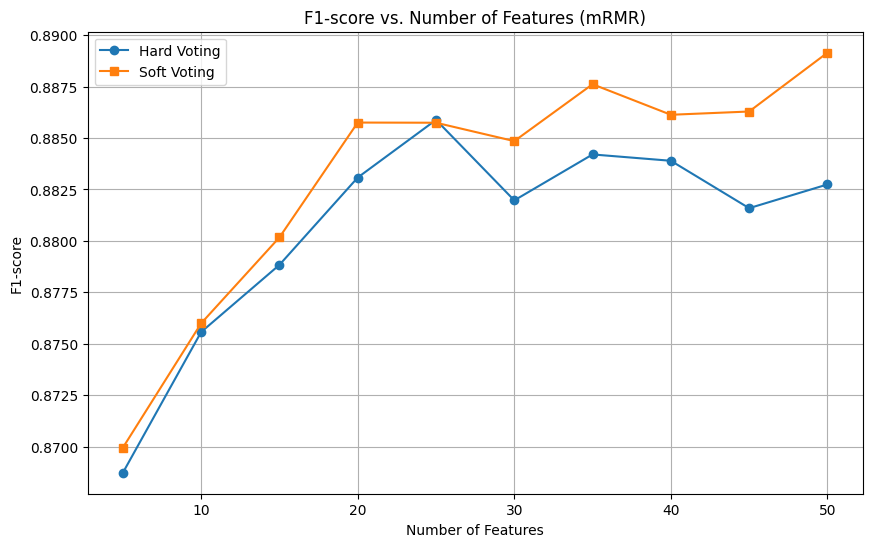

In [ ]:
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, VotingClassifier

# Create StratifiedKFold splitter
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Initialize lists to store metrics
f1_scores_per_feature = []

# Feature range for testing different numbers of features selected by mRMR
feature_range = range(5, 51, 5)

# Loop through different feature numbers
for num_features in feature_range:
    print(f"\n🌟 Testing with top {num_features} features using mRMR")

    # Accumulate overall metrics for each feature selection
    all_y_true_hard = []
    all_y_pred_hard = []

    all_y_true_soft = []
    all_y_pred_soft = []

    # Loop through folds
    for fold, (train_index, test_index) in enumerate(skf.split(X, y), 1):
        print(f"\n🧪 Fold {fold}")
        X_train, X_test = X.loc[train_index, :], X.loc[test_index, :]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        data_train = pd.DataFrame()
        data_train['target'] = y_train
        data_train = pd.concat([data_train, X_train], axis=1)

        data_train.columns = data_train.columns.astype(str)

        # Apply mRMR to select features
        selected_features = pymrmr.mRMR(data_train, 'MIQ', num_features)

        X_train_selected = X_train[selected_features]
        X_test_selected = X_test[selected_features]

        models = [
            ('xgb', XGBClassifier(random_state=42, eval_metric='mlogloss')),
            ('adb', AdaBoostClassifier(random_state=42)),
            ('gbc', GradientBoostingClassifier(random_state=42)),
            ('cat', CatBoostClassifier(verbose=0, random_state=42)),
        ]

        model_weights = [1.0, 1.0, 1.0, 1.0]

        # --- Hard Voting ---
        hard_voting_clf = VotingClassifier(estimators=models, voting='hard', weights=model_weights)
        hard_voting_clf.fit(X_train_selected, y_train)
        hard_preds = hard_voting_clf.predict(X_test_selected)

        # Store predictions and true labels for this fold
        all_y_true_hard.extend(y_test)
        all_y_pred_hard.extend(hard_preds)

        # --- Soft Voting ---
        soft_voting_clf = VotingClassifier(estimators=models, voting='soft', weights=model_weights)
        soft_voting_clf.fit(X_train_selected, y_train)
        soft_preds = soft_voting_clf.predict(X_test_selected)

        # Store predictions and true labels for this fold
        all_y_true_soft.extend(y_test)
        all_y_pred_soft.extend(soft_preds)

    # After all folds, calculate overall metrics for this feature set
    acc_hard = accuracy_score(all_y_true_hard, all_y_pred_hard)
    f1_hard = f1_score(all_y_true_hard, all_y_pred_hard, average='weighted')

    acc_soft = accuracy_score(all_y_true_soft, all_y_pred_soft)
    f1_soft = f1_score(all_y_true_soft, all_y_pred_soft, average='weighted')

    print(f"\n🔵 Overall Hard Voting F1-score for {num_features} features: {f1_hard:.4f}")
    print(f"🟣 Overall Soft Voting F1-score for {num_features} features: {f1_soft:.4f}")

    # Store the average F1-scores for plotting
    f1_scores_per_feature.append((num_features, f1_hard, f1_soft))

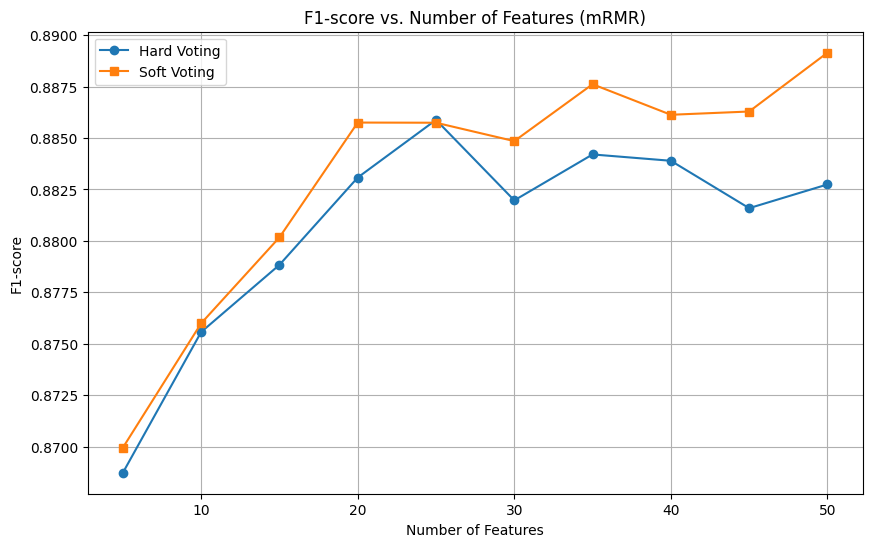

In [ ]:
# Convert results to a DataFrame for easier plotting
f1_df = pd.DataFrame(f1_scores_per_feature, columns=['Features', 'Hard Voting F1', 'Soft Voting F1'])

# Plot F1-score vs. number of features
plt.figure(figsize=(10, 6))
plt.plot(f1_df['Features'], f1_df['Hard Voting F1'], label='Hard Voting', marker='o')
plt.plot(f1_df['Features'], f1_df['Soft Voting F1'], label='Soft Voting', marker='s')

plt.xlabel('Number of Features')
plt.ylabel('F1-score')
plt.title('F1-score vs. Number of Features (mRMR)')
plt.legend()
plt.grid(True)
plt.show()

### **55 - 90 features**

In [ ]:
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, VotingClassifier

# Create StratifiedKFold splitter
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Initialize lists to store metrics
f1_scores_per_feature = []

# Feature range for testing different numbers of features selected by mRMR
feature_range = range(55, 90, 5)

# Loop through different feature numbers
for num_features in feature_range:
    print(f"\n🌟 Testing with top {num_features} features using mRMR")

    # Accumulate overall metrics for each feature selection
    all_y_true_hard = []
    all_y_pred_hard = []

    all_y_true_soft = []
    all_y_pred_soft = []

    # Loop through folds
    for fold, (train_index, test_index) in enumerate(skf.split(X, y), 1):
        print(f"\n🧪 Fold {fold}")
        X_train, X_test = X.loc[train_index, :], X.loc[test_index, :]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        data_train = pd.DataFrame()
        data_train['target'] = y_train
        data_train = pd.concat([data_train, X_train], axis=1)

        data_train.columns = data_train.columns.astype(str)

        # Apply mRMR to select features
        selected_features = pymrmr.mRMR(data_train, 'MIQ', num_features)

        X_train_selected = X_train[selected_features]
        X_test_selected = X_test[selected_features]

        models = [
            ('xgb', XGBClassifier(random_state=42, eval_metric='mlogloss')),
            ('adb', AdaBoostClassifier(random_state=42)),
            ('gbc', GradientBoostingClassifier(random_state=42)),
            ('cat', CatBoostClassifier(verbose=0, random_state=42)),
        ]

        model_weights = [1.0, 1.0, 1.0, 1.0]

        # --- Hard Voting ---
        hard_voting_clf = VotingClassifier(estimators=models, voting='hard', weights=model_weights)
        hard_voting_clf.fit(X_train_selected, y_train)
        hard_preds = hard_voting_clf.predict(X_test_selected)

        # Store predictions and true labels for this fold
        all_y_true_hard.extend(y_test)
        all_y_pred_hard.extend(hard_preds)

        # --- Soft Voting ---
        soft_voting_clf = VotingClassifier(estimators=models, voting='soft', weights=model_weights)
        soft_voting_clf.fit(X_train_selected, y_train)
        soft_preds = soft_voting_clf.predict(X_test_selected)

        # Store predictions and true labels for this fold
        all_y_true_soft.extend(y_test)
        all_y_pred_soft.extend(soft_preds)

    # After all folds, calculate overall metrics for this feature set
    acc_hard = accuracy_score(all_y_true_hard, all_y_pred_hard)
    f1_hard = f1_score(all_y_true_hard, all_y_pred_hard, average='weighted')

    acc_soft = accuracy_score(all_y_true_soft, all_y_pred_soft)
    f1_soft = f1_score(all_y_true_soft, all_y_pred_soft, average='weighted')

    print(f"\n🔵 Overall Hard Voting F1-score for {num_features} features: {f1_hard:.4f}")
    print(f"🟣 Overall Soft Voting F1-score for {num_features} features: {f1_soft:.4f}")

    # Store the average F1-scores for plotting
    f1_scores_per_feature.append((num_features, f1_hard, f1_soft))


🌟 Testing with top 55 features using mRMR

🧪 Fold 1

🧪 Fold 2

🧪 Fold 3

🧪 Fold 4

🧪 Fold 5

🧪 Fold 6

🧪 Fold 7

🧪 Fold 8

🧪 Fold 9

🧪 Fold 10

🔵 Overall Hard Voting F1-score for 55 features: 0.8846
🟣 Overall Soft Voting F1-score for 55 features: 0.8893

🌟 Testing with top 60 features using mRMR

🧪 Fold 1

🧪 Fold 2

🧪 Fold 3

🧪 Fold 4

🧪 Fold 5

🧪 Fold 6

🧪 Fold 7

🧪 Fold 8

🧪 Fold 9

🧪 Fold 10

🔵 Overall Hard Voting F1-score for 60 features: 0.8823
🟣 Overall Soft Voting F1-score for 60 features: 0.8885

🌟 Testing with top 65 features using mRMR

🧪 Fold 1

🧪 Fold 2

🧪 Fold 3

🧪 Fold 4

🧪 Fold 5

🧪 Fold 6

🧪 Fold 7

🧪 Fold 8

🧪 Fold 9

🧪 Fold 10

🔵 Overall Hard Voting F1-score for 65 features: 0.8823
🟣 Overall Soft Voting F1-score for 65 features: 0.8898

🌟 Testing with top 70 features using mRMR

🧪 Fold 1

🧪 Fold 2

🧪 Fold 3

🧪 Fold 4

🧪 Fold 5

🧪 Fold 6

🧪 Fold 7

🧪 Fold 8

🧪 Fold 9

🧪 Fold 10

🔵 Overall Hard Voting F1-score for 70 features: 0.8858
🟣 Overall Soft Voting F1-score for 

### **90 - 100 features**

In [ ]:
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, VotingClassifier

# Create StratifiedKFold splitter
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Initialize lists to store metrics
f1_scores_per_feature = []

# Feature range for testing different numbers of features selected by mRMR
feature_range = range(90, 101, 5)

# Loop through different feature numbers
for num_features in feature_range:
    print(f"\n🌟 Testing with top {num_features} features using mRMR")

    # Accumulate overall metrics for each feature selection
    all_y_true_hard = []
    all_y_pred_hard = []

    all_y_true_soft = []
    all_y_pred_soft = []

    # Loop through folds
    for fold, (train_index, test_index) in enumerate(skf.split(X, y), 1):
        if fold == 10:
          print(f"🧪 Fold {fold}")
        else:
          print(f"🧪 Fold {fold}", end = " ")
        X_train, X_test = X.loc[train_index, :], X.loc[test_index, :]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        data_train = pd.DataFrame()
        data_train['target'] = y_train
        data_train = pd.concat([data_train, X_train], axis=1)

        data_train.columns = data_train.columns.astype(str)

        # Apply mRMR to select features
        selected_features = pymrmr.mRMR(data_train, 'MIQ', num_features)

        X_train_selected = X_train[selected_features]
        X_test_selected = X_test[selected_features]

        models = [
            ('xgb', XGBClassifier(random_state=42, eval_metric='mlogloss')),
            ('adb', AdaBoostClassifier(random_state=42)),
            ('gbc', GradientBoostingClassifier(random_state=42)),
            ('cat', CatBoostClassifier(verbose=0, random_state=42)),
        ]

        model_weights = [1.0, 1.0, 1.0, 1.0]

        # --- Hard Voting ---
        hard_voting_clf = VotingClassifier(estimators=models, voting='hard', weights=model_weights)
        hard_voting_clf.fit(X_train_selected, y_train)
        hard_preds = hard_voting_clf.predict(X_test_selected)

        # Store predictions and true labels for this fold
        all_y_true_hard.extend(y_test)
        all_y_pred_hard.extend(hard_preds)

        # --- Soft Voting ---
        soft_voting_clf = VotingClassifier(estimators=models, voting='soft', weights=model_weights)
        soft_voting_clf.fit(X_train_selected, y_train)
        soft_preds = soft_voting_clf.predict(X_test_selected)

        # Store predictions and true labels for this fold
        all_y_true_soft.extend(y_test)
        all_y_pred_soft.extend(soft_preds)

    # After all folds, calculate overall metrics for this feature set
    acc_hard = accuracy_score(all_y_true_hard, all_y_pred_hard)
    f1_hard = f1_score(all_y_true_hard, all_y_pred_hard, average='weighted')

    acc_soft = accuracy_score(all_y_true_soft, all_y_pred_soft)
    f1_soft = f1_score(all_y_true_soft, all_y_pred_soft, average='weighted')

    print(f"\n🔵 Overall Hard Voting F1-score for {num_features} features: {f1_hard:.4f}")
    print(f"🟣 Overall Soft Voting F1-score for {num_features} features: {f1_soft:.4f}")

    # Store the average F1-scores for plotting
    f1_scores_per_feature.append((num_features, f1_hard, f1_soft))


🌟 Testing with top 90 features using mRMR
🧪 Fold 1 🧪 Fold 2 🧪 Fold 3 🧪 Fold 4 🧪 Fold 5 🧪 Fold 6 🧪 Fold 7 🧪 Fold 8 🧪 Fold 9 🧪 Fold 10

🔵 Overall Hard Voting F1-score for 90 features: 0.8781
🟣 Overall Soft Voting F1-score for 90 features: 0.8902

🌟 Testing with top 95 features using mRMR
🧪 Fold 1 🧪 Fold 2 🧪 Fold 3 🧪 Fold 4 🧪 Fold 5 🧪 Fold 6 🧪 Fold 7 🧪 Fold 8 🧪 Fold 9 🧪 Fold 10

🔵 Overall Hard Voting F1-score for 95 features: 0.8822
🟣 Overall Soft Voting F1-score for 95 features: 0.8898

🌟 Testing with top 100 features using mRMR
🧪 Fold 1 🧪 Fold 2 🧪 Fold 3 🧪 Fold 4 🧪 Fold 5 🧪 Fold 6 🧪 Fold 7 🧪 Fold 8 🧪 Fold 9 🧪 Fold 10

🔵 Overall Hard Voting F1-score for 100 features: 0.8825
🟣 Overall Soft Voting F1-score for 100 features: 0.8911


### **100 - 196 (max) features**

In [ ]:
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, VotingClassifier

# Create StratifiedKFold splitter
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Initialize lists to store metrics
f1_scores_per_feature = []

# Feature range for testing different numbers of features selected by mRMR
feature_range = range(100, 196, 5)

# Loop through different feature numbers
for num_features in feature_range:
    print(f"\n🌟 Testing with top {num_features} features using mRMR")

    # Accumulate overall metrics for each feature selection
    all_y_true_hard = []
    all_y_pred_hard = []

    all_y_true_soft = []
    all_y_pred_soft = []

    # Loop through folds
    for fold, (train_index, test_index) in enumerate(skf.split(X, y), 1):
        if fold == 10:
          print(f"🧪 Fold {fold}")
        else:
          print(f"🧪 Fold {fold}", end = " ")
        X_train, X_test = X.loc[train_index, :], X.loc[test_index, :]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        data_train = pd.DataFrame()
        data_train['target'] = y_train
        data_train = pd.concat([data_train, X_train], axis=1)

        data_train.columns = data_train.columns.astype(str)

        # Apply mRMR to select features
        selected_features = pymrmr.mRMR(data_train, 'MIQ', num_features)

        X_train_selected = X_train[selected_features]
        X_test_selected = X_test[selected_features]

        models = [
            ('xgb', XGBClassifier(random_state=42, eval_metric='mlogloss')),
            ('adb', AdaBoostClassifier(random_state=42)),
            ('gbc', GradientBoostingClassifier(random_state=42)),
            ('cat', CatBoostClassifier(verbose=0, random_state=42)),
        ]

        model_weights = [1.0, 1.0, 1.0, 1.0]

        # --- Hard Voting ---
        hard_voting_clf = VotingClassifier(estimators=models, voting='hard', weights=model_weights)
        hard_voting_clf.fit(X_train_selected, y_train)
        hard_preds = hard_voting_clf.predict(X_test_selected)

        # Store predictions and true labels for this fold
        all_y_true_hard.extend(y_test)
        all_y_pred_hard.extend(hard_preds)

        # --- Soft Voting ---
        soft_voting_clf = VotingClassifier(estimators=models, voting='soft', weights=model_weights)
        soft_voting_clf.fit(X_train_selected, y_train)
        soft_preds = soft_voting_clf.predict(X_test_selected)

        # Store predictions and true labels for this fold
        all_y_true_soft.extend(y_test)
        all_y_pred_soft.extend(soft_preds)

    # After all folds, calculate overall metrics for this feature set
    acc_hard = accuracy_score(all_y_true_hard, all_y_pred_hard)
    f1_hard = f1_score(all_y_true_hard, all_y_pred_hard, average='weighted')

    acc_soft = accuracy_score(all_y_true_soft, all_y_pred_soft)
    f1_soft = f1_score(all_y_true_soft, all_y_pred_soft, average='weighted')

    print(f"\n🔵 Overall Hard Voting F1-score for {num_features} features: {f1_hard:.4f}")
    print(f"🟣 Overall Soft Voting F1-score for {num_features} features: {f1_soft:.4f}")

    # Store the average F1-scores for plotting
    f1_scores_per_feature.append((num_features, f1_hard, f1_soft))


🌟 Testing with top 100 features using mRMR
🧪 Fold 1 

d:\anaconda3\envs\Py3126\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
d:\anaconda3\envs\Py3126\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


🧪 Fold 2 

d:\anaconda3\envs\Py3126\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
d:\anaconda3\envs\Py3126\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


🧪 Fold 3 

d:\anaconda3\envs\Py3126\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
d:\anaconda3\envs\Py3126\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


🧪 Fold 4 

d:\anaconda3\envs\Py3126\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
d:\anaconda3\envs\Py3126\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


🧪 Fold 5 

d:\anaconda3\envs\Py3126\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
d:\anaconda3\envs\Py3126\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


🧪 Fold 6 

d:\anaconda3\envs\Py3126\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
d:\anaconda3\envs\Py3126\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


🧪 Fold 7 

d:\anaconda3\envs\Py3126\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
d:\anaconda3\envs\Py3126\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


🧪 Fold 8 

d:\anaconda3\envs\Py3126\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
d:\anaconda3\envs\Py3126\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


🧪 Fold 9 

d:\anaconda3\envs\Py3126\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
d:\anaconda3\envs\Py3126\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


🧪 Fold 10


d:\anaconda3\envs\Py3126\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
d:\anaconda3\envs\Py3126\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(



🔵 Overall Hard Voting F1-score for 100 features: 0.8853
🟣 Overall Soft Voting F1-score for 100 features: 0.8918

🌟 Testing with top 105 features using mRMR
🧪 Fold 1 

d:\anaconda3\envs\Py3126\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
d:\anaconda3\envs\Py3126\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


🧪 Fold 2 

d:\anaconda3\envs\Py3126\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
d:\anaconda3\envs\Py3126\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


🧪 Fold 3 

d:\anaconda3\envs\Py3126\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
d:\anaconda3\envs\Py3126\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


🧪 Fold 4 

d:\anaconda3\envs\Py3126\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
d:\anaconda3\envs\Py3126\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


🧪 Fold 5 

d:\anaconda3\envs\Py3126\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
d:\anaconda3\envs\Py3126\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


🧪 Fold 6 

d:\anaconda3\envs\Py3126\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
d:\anaconda3\envs\Py3126\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


🧪 Fold 7 

d:\anaconda3\envs\Py3126\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
d:\anaconda3\envs\Py3126\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


🧪 Fold 8 

d:\anaconda3\envs\Py3126\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
d:\anaconda3\envs\Py3126\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


🧪 Fold 9 

d:\anaconda3\envs\Py3126\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
d:\anaconda3\envs\Py3126\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


🧪 Fold 10


d:\anaconda3\envs\Py3126\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
d:\anaconda3\envs\Py3126\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(



🔵 Overall Hard Voting F1-score for 105 features: 0.8855
🟣 Overall Soft Voting F1-score for 105 features: 0.8913

🌟 Testing with top 110 features using mRMR
🧪 Fold 1 

d:\anaconda3\envs\Py3126\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
d:\anaconda3\envs\Py3126\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


🧪 Fold 2 

d:\anaconda3\envs\Py3126\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
d:\anaconda3\envs\Py3126\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


🧪 Fold 3 

d:\anaconda3\envs\Py3126\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
d:\anaconda3\envs\Py3126\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


🧪 Fold 4 

d:\anaconda3\envs\Py3126\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
d:\anaconda3\envs\Py3126\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


🧪 Fold 5 

d:\anaconda3\envs\Py3126\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
d:\anaconda3\envs\Py3126\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


🧪 Fold 6 

d:\anaconda3\envs\Py3126\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
d:\anaconda3\envs\Py3126\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


🧪 Fold 7 

d:\anaconda3\envs\Py3126\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
d:\anaconda3\envs\Py3126\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


🧪 Fold 8 

d:\anaconda3\envs\Py3126\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
d:\anaconda3\envs\Py3126\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


🧪 Fold 9 

d:\anaconda3\envs\Py3126\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
d:\anaconda3\envs\Py3126\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


🧪 Fold 10


d:\anaconda3\envs\Py3126\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
d:\anaconda3\envs\Py3126\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(



🔵 Overall Hard Voting F1-score for 110 features: 0.8871
🟣 Overall Soft Voting F1-score for 110 features: 0.8933

🌟 Testing with top 115 features using mRMR
🧪 Fold 1 

d:\anaconda3\envs\Py3126\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
d:\anaconda3\envs\Py3126\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


🧪 Fold 2 

d:\anaconda3\envs\Py3126\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
d:\anaconda3\envs\Py3126\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


🧪 Fold 3 

d:\anaconda3\envs\Py3126\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
d:\anaconda3\envs\Py3126\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


🧪 Fold 4 

d:\anaconda3\envs\Py3126\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
d:\anaconda3\envs\Py3126\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


🧪 Fold 5 

d:\anaconda3\envs\Py3126\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
d:\anaconda3\envs\Py3126\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


🧪 Fold 6 

d:\anaconda3\envs\Py3126\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
d:\anaconda3\envs\Py3126\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


🧪 Fold 7 

d:\anaconda3\envs\Py3126\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
d:\anaconda3\envs\Py3126\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


🧪 Fold 8 

d:\anaconda3\envs\Py3126\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
d:\anaconda3\envs\Py3126\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


🧪 Fold 9 

d:\anaconda3\envs\Py3126\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
d:\anaconda3\envs\Py3126\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


🧪 Fold 10


d:\anaconda3\envs\Py3126\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
d:\anaconda3\envs\Py3126\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(



🔵 Overall Hard Voting F1-score for 115 features: 0.8898
🟣 Overall Soft Voting F1-score for 115 features: 0.8964

🌟 Testing with top 120 features using mRMR
🧪 Fold 1 

d:\anaconda3\envs\Py3126\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
d:\anaconda3\envs\Py3126\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


🧪 Fold 2 

d:\anaconda3\envs\Py3126\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
d:\anaconda3\envs\Py3126\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


🧪 Fold 3 

d:\anaconda3\envs\Py3126\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
d:\anaconda3\envs\Py3126\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


🧪 Fold 4 

d:\anaconda3\envs\Py3126\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
d:\anaconda3\envs\Py3126\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


🧪 Fold 5 

d:\anaconda3\envs\Py3126\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
d:\anaconda3\envs\Py3126\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


🧪 Fold 6 

d:\anaconda3\envs\Py3126\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
d:\anaconda3\envs\Py3126\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


🧪 Fold 7 

d:\anaconda3\envs\Py3126\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
d:\anaconda3\envs\Py3126\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


🧪 Fold 8 

d:\anaconda3\envs\Py3126\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
d:\anaconda3\envs\Py3126\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


🧪 Fold 9 

d:\anaconda3\envs\Py3126\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
d:\anaconda3\envs\Py3126\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


🧪 Fold 10


d:\anaconda3\envs\Py3126\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
d:\anaconda3\envs\Py3126\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(



🔵 Overall Hard Voting F1-score for 120 features: 0.8878
🟣 Overall Soft Voting F1-score for 120 features: 0.8970

🌟 Testing with top 125 features using mRMR
🧪 Fold 1 

d:\anaconda3\envs\Py3126\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
d:\anaconda3\envs\Py3126\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


🧪 Fold 2 

d:\anaconda3\envs\Py3126\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
d:\anaconda3\envs\Py3126\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


🧪 Fold 3 

d:\anaconda3\envs\Py3126\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
d:\anaconda3\envs\Py3126\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


🧪 Fold 4 

d:\anaconda3\envs\Py3126\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
d:\anaconda3\envs\Py3126\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


🧪 Fold 5 

d:\anaconda3\envs\Py3126\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
d:\anaconda3\envs\Py3126\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


🧪 Fold 6 

d:\anaconda3\envs\Py3126\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
d:\anaconda3\envs\Py3126\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


🧪 Fold 7 

d:\anaconda3\envs\Py3126\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
d:\anaconda3\envs\Py3126\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


🧪 Fold 8 

d:\anaconda3\envs\Py3126\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
d:\anaconda3\envs\Py3126\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


🧪 Fold 9 

d:\anaconda3\envs\Py3126\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
d:\anaconda3\envs\Py3126\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


🧪 Fold 10


d:\anaconda3\envs\Py3126\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
d:\anaconda3\envs\Py3126\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(



🔵 Overall Hard Voting F1-score for 125 features: 0.8902
🟣 Overall Soft Voting F1-score for 125 features: 0.8979

🌟 Testing with top 130 features using mRMR
🧪 Fold 1 

d:\anaconda3\envs\Py3126\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
d:\anaconda3\envs\Py3126\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


🧪 Fold 2 

d:\anaconda3\envs\Py3126\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
d:\anaconda3\envs\Py3126\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


🧪 Fold 3 

d:\anaconda3\envs\Py3126\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
d:\anaconda3\envs\Py3126\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


🧪 Fold 4 

d:\anaconda3\envs\Py3126\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
d:\anaconda3\envs\Py3126\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


🧪 Fold 5 

d:\anaconda3\envs\Py3126\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
d:\anaconda3\envs\Py3126\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


🧪 Fold 6 

d:\anaconda3\envs\Py3126\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
d:\anaconda3\envs\Py3126\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


🧪 Fold 7 

d:\anaconda3\envs\Py3126\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
d:\anaconda3\envs\Py3126\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


🧪 Fold 8 

d:\anaconda3\envs\Py3126\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
d:\anaconda3\envs\Py3126\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


🧪 Fold 9 

d:\anaconda3\envs\Py3126\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
d:\anaconda3\envs\Py3126\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


🧪 Fold 10


d:\anaconda3\envs\Py3126\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
d:\anaconda3\envs\Py3126\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(



🔵 Overall Hard Voting F1-score for 130 features: 0.8875
🟣 Overall Soft Voting F1-score for 130 features: 0.8973

🌟 Testing with top 135 features using mRMR
🧪 Fold 1 

d:\anaconda3\envs\Py3126\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
d:\anaconda3\envs\Py3126\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


🧪 Fold 2 

d:\anaconda3\envs\Py3126\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
d:\anaconda3\envs\Py3126\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


🧪 Fold 3 

d:\anaconda3\envs\Py3126\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
d:\anaconda3\envs\Py3126\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


🧪 Fold 4 

d:\anaconda3\envs\Py3126\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
d:\anaconda3\envs\Py3126\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


🧪 Fold 5 

d:\anaconda3\envs\Py3126\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
d:\anaconda3\envs\Py3126\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


🧪 Fold 6 

d:\anaconda3\envs\Py3126\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
d:\anaconda3\envs\Py3126\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


🧪 Fold 7 

d:\anaconda3\envs\Py3126\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
d:\anaconda3\envs\Py3126\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


🧪 Fold 8 

d:\anaconda3\envs\Py3126\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
d:\anaconda3\envs\Py3126\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


🧪 Fold 9 

d:\anaconda3\envs\Py3126\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
d:\anaconda3\envs\Py3126\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


🧪 Fold 10


d:\anaconda3\envs\Py3126\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
d:\anaconda3\envs\Py3126\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(



🔵 Overall Hard Voting F1-score for 135 features: 0.8902
🟣 Overall Soft Voting F1-score for 135 features: 0.8981

🌟 Testing with top 140 features using mRMR
🧪 Fold 1 

d:\anaconda3\envs\Py3126\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
d:\anaconda3\envs\Py3126\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


🧪 Fold 2 

d:\anaconda3\envs\Py3126\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
d:\anaconda3\envs\Py3126\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


🧪 Fold 3 

d:\anaconda3\envs\Py3126\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
d:\anaconda3\envs\Py3126\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


🧪 Fold 4 

d:\anaconda3\envs\Py3126\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
d:\anaconda3\envs\Py3126\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


🧪 Fold 5 

d:\anaconda3\envs\Py3126\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
d:\anaconda3\envs\Py3126\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


🧪 Fold 6 

d:\anaconda3\envs\Py3126\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
d:\anaconda3\envs\Py3126\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


🧪 Fold 7 

d:\anaconda3\envs\Py3126\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
d:\anaconda3\envs\Py3126\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


🧪 Fold 8 

d:\anaconda3\envs\Py3126\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
d:\anaconda3\envs\Py3126\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


🧪 Fold 9 

d:\anaconda3\envs\Py3126\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
d:\anaconda3\envs\Py3126\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


🧪 Fold 10


d:\anaconda3\envs\Py3126\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
d:\anaconda3\envs\Py3126\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(



🔵 Overall Hard Voting F1-score for 140 features: 0.8900
🟣 Overall Soft Voting F1-score for 140 features: 0.8960

🌟 Testing with top 145 features using mRMR
🧪 Fold 1 

d:\anaconda3\envs\Py3126\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
d:\anaconda3\envs\Py3126\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


🧪 Fold 2 

d:\anaconda3\envs\Py3126\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
d:\anaconda3\envs\Py3126\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


🧪 Fold 3 

d:\anaconda3\envs\Py3126\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
d:\anaconda3\envs\Py3126\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


🧪 Fold 4 

d:\anaconda3\envs\Py3126\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
d:\anaconda3\envs\Py3126\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


🧪 Fold 5 

d:\anaconda3\envs\Py3126\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
d:\anaconda3\envs\Py3126\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


🧪 Fold 6 

d:\anaconda3\envs\Py3126\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
d:\anaconda3\envs\Py3126\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


🧪 Fold 7 

d:\anaconda3\envs\Py3126\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
d:\anaconda3\envs\Py3126\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


🧪 Fold 8 

d:\anaconda3\envs\Py3126\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
d:\anaconda3\envs\Py3126\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


🧪 Fold 9 

d:\anaconda3\envs\Py3126\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
d:\anaconda3\envs\Py3126\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


🧪 Fold 10


d:\anaconda3\envs\Py3126\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
d:\anaconda3\envs\Py3126\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(



🔵 Overall Hard Voting F1-score for 145 features: 0.8887
🟣 Overall Soft Voting F1-score for 145 features: 0.8966

🌟 Testing with top 150 features using mRMR
🧪 Fold 1 

d:\anaconda3\envs\Py3126\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
d:\anaconda3\envs\Py3126\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


🧪 Fold 2 

d:\anaconda3\envs\Py3126\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
d:\anaconda3\envs\Py3126\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


🧪 Fold 3 

d:\anaconda3\envs\Py3126\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
d:\anaconda3\envs\Py3126\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


🧪 Fold 4 

d:\anaconda3\envs\Py3126\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
d:\anaconda3\envs\Py3126\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


🧪 Fold 5 

d:\anaconda3\envs\Py3126\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
d:\anaconda3\envs\Py3126\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


🧪 Fold 6 

d:\anaconda3\envs\Py3126\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
d:\anaconda3\envs\Py3126\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


🧪 Fold 7 

d:\anaconda3\envs\Py3126\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
d:\anaconda3\envs\Py3126\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


🧪 Fold 8 

d:\anaconda3\envs\Py3126\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
d:\anaconda3\envs\Py3126\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


🧪 Fold 9 

d:\anaconda3\envs\Py3126\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
d:\anaconda3\envs\Py3126\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


🧪 Fold 10


d:\anaconda3\envs\Py3126\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
d:\anaconda3\envs\Py3126\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(



🔵 Overall Hard Voting F1-score for 150 features: 0.8906
🟣 Overall Soft Voting F1-score for 150 features: 0.8989

🌟 Testing with top 155 features using mRMR
🧪 Fold 1 

d:\anaconda3\envs\Py3126\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
d:\anaconda3\envs\Py3126\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


🧪 Fold 2 

d:\anaconda3\envs\Py3126\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
d:\anaconda3\envs\Py3126\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


🧪 Fold 3 

d:\anaconda3\envs\Py3126\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
d:\anaconda3\envs\Py3126\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


🧪 Fold 4 

d:\anaconda3\envs\Py3126\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
d:\anaconda3\envs\Py3126\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


🧪 Fold 5 

d:\anaconda3\envs\Py3126\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
d:\anaconda3\envs\Py3126\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


🧪 Fold 6 

d:\anaconda3\envs\Py3126\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
d:\anaconda3\envs\Py3126\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


🧪 Fold 7 

d:\anaconda3\envs\Py3126\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
d:\anaconda3\envs\Py3126\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


🧪 Fold 8 

d:\anaconda3\envs\Py3126\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
d:\anaconda3\envs\Py3126\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


🧪 Fold 9 

d:\anaconda3\envs\Py3126\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
d:\anaconda3\envs\Py3126\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


🧪 Fold 10


d:\anaconda3\envs\Py3126\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
d:\anaconda3\envs\Py3126\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(



🔵 Overall Hard Voting F1-score for 155 features: 0.8917
🟣 Overall Soft Voting F1-score for 155 features: 0.8964

🌟 Testing with top 160 features using mRMR
🧪 Fold 1 

d:\anaconda3\envs\Py3126\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
d:\anaconda3\envs\Py3126\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


🧪 Fold 2 

d:\anaconda3\envs\Py3126\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
d:\anaconda3\envs\Py3126\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


🧪 Fold 3 

d:\anaconda3\envs\Py3126\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
d:\anaconda3\envs\Py3126\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


🧪 Fold 4 

d:\anaconda3\envs\Py3126\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
d:\anaconda3\envs\Py3126\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


🧪 Fold 5 

d:\anaconda3\envs\Py3126\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
d:\anaconda3\envs\Py3126\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


🧪 Fold 6 

d:\anaconda3\envs\Py3126\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
d:\anaconda3\envs\Py3126\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


🧪 Fold 7 

d:\anaconda3\envs\Py3126\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
d:\anaconda3\envs\Py3126\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


🧪 Fold 8 

d:\anaconda3\envs\Py3126\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
d:\anaconda3\envs\Py3126\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


🧪 Fold 9 

d:\anaconda3\envs\Py3126\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
d:\anaconda3\envs\Py3126\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


🧪 Fold 10


d:\anaconda3\envs\Py3126\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
d:\anaconda3\envs\Py3126\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(



🔵 Overall Hard Voting F1-score for 160 features: 0.8911
🟣 Overall Soft Voting F1-score for 160 features: 0.8977

🌟 Testing with top 165 features using mRMR
🧪 Fold 1 

d:\anaconda3\envs\Py3126\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
d:\anaconda3\envs\Py3126\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


🧪 Fold 2 

d:\anaconda3\envs\Py3126\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
d:\anaconda3\envs\Py3126\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


🧪 Fold 3 

d:\anaconda3\envs\Py3126\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
d:\anaconda3\envs\Py3126\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


🧪 Fold 4 

d:\anaconda3\envs\Py3126\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
d:\anaconda3\envs\Py3126\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


🧪 Fold 5 

d:\anaconda3\envs\Py3126\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
d:\anaconda3\envs\Py3126\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


🧪 Fold 6 

d:\anaconda3\envs\Py3126\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
d:\anaconda3\envs\Py3126\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


🧪 Fold 7 

d:\anaconda3\envs\Py3126\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
d:\anaconda3\envs\Py3126\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


🧪 Fold 8 

d:\anaconda3\envs\Py3126\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
d:\anaconda3\envs\Py3126\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


🧪 Fold 9 

d:\anaconda3\envs\Py3126\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
d:\anaconda3\envs\Py3126\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


🧪 Fold 10


d:\anaconda3\envs\Py3126\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
d:\anaconda3\envs\Py3126\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(



🔵 Overall Hard Voting F1-score for 165 features: 0.8926
🟣 Overall Soft Voting F1-score for 165 features: 0.9027

🌟 Testing with top 170 features using mRMR
🧪 Fold 1 

d:\anaconda3\envs\Py3126\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
d:\anaconda3\envs\Py3126\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


🧪 Fold 2 

d:\anaconda3\envs\Py3126\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
d:\anaconda3\envs\Py3126\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


🧪 Fold 3 

d:\anaconda3\envs\Py3126\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
d:\anaconda3\envs\Py3126\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


🧪 Fold 4 

d:\anaconda3\envs\Py3126\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
d:\anaconda3\envs\Py3126\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


🧪 Fold 5 

d:\anaconda3\envs\Py3126\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
d:\anaconda3\envs\Py3126\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


🧪 Fold 6 

d:\anaconda3\envs\Py3126\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
d:\anaconda3\envs\Py3126\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


🧪 Fold 7 

d:\anaconda3\envs\Py3126\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
d:\anaconda3\envs\Py3126\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


🧪 Fold 8 

d:\anaconda3\envs\Py3126\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
d:\anaconda3\envs\Py3126\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


🧪 Fold 9 

d:\anaconda3\envs\Py3126\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
d:\anaconda3\envs\Py3126\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


🧪 Fold 10


d:\anaconda3\envs\Py3126\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
d:\anaconda3\envs\Py3126\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(



🔵 Overall Hard Voting F1-score for 170 features: 0.8891
🟣 Overall Soft Voting F1-score for 170 features: 0.8992

🌟 Testing with top 175 features using mRMR
🧪 Fold 1 

d:\anaconda3\envs\Py3126\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
d:\anaconda3\envs\Py3126\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


🧪 Fold 2 

d:\anaconda3\envs\Py3126\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
d:\anaconda3\envs\Py3126\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


🧪 Fold 3 

d:\anaconda3\envs\Py3126\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
d:\anaconda3\envs\Py3126\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


🧪 Fold 4 

d:\anaconda3\envs\Py3126\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
d:\anaconda3\envs\Py3126\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


🧪 Fold 5 

d:\anaconda3\envs\Py3126\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
d:\anaconda3\envs\Py3126\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


🧪 Fold 6 

d:\anaconda3\envs\Py3126\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
d:\anaconda3\envs\Py3126\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


🧪 Fold 7 

d:\anaconda3\envs\Py3126\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
d:\anaconda3\envs\Py3126\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


🧪 Fold 8 

d:\anaconda3\envs\Py3126\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
d:\anaconda3\envs\Py3126\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


🧪 Fold 9 

d:\anaconda3\envs\Py3126\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
d:\anaconda3\envs\Py3126\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


🧪 Fold 10


d:\anaconda3\envs\Py3126\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
d:\anaconda3\envs\Py3126\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(



🔵 Overall Hard Voting F1-score for 175 features: 0.8917
🟣 Overall Soft Voting F1-score for 175 features: 0.8967

🌟 Testing with top 180 features using mRMR
🧪 Fold 1 

d:\anaconda3\envs\Py3126\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
d:\anaconda3\envs\Py3126\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


🧪 Fold 2 

d:\anaconda3\envs\Py3126\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
d:\anaconda3\envs\Py3126\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


🧪 Fold 3 

d:\anaconda3\envs\Py3126\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
d:\anaconda3\envs\Py3126\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


🧪 Fold 4 

d:\anaconda3\envs\Py3126\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
d:\anaconda3\envs\Py3126\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


🧪 Fold 5 

d:\anaconda3\envs\Py3126\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
d:\anaconda3\envs\Py3126\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


🧪 Fold 6 

d:\anaconda3\envs\Py3126\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
d:\anaconda3\envs\Py3126\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


🧪 Fold 7 

d:\anaconda3\envs\Py3126\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
d:\anaconda3\envs\Py3126\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


🧪 Fold 8 

d:\anaconda3\envs\Py3126\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
d:\anaconda3\envs\Py3126\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


🧪 Fold 9 

d:\anaconda3\envs\Py3126\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
d:\anaconda3\envs\Py3126\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


🧪 Fold 10


d:\anaconda3\envs\Py3126\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
d:\anaconda3\envs\Py3126\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(



🔵 Overall Hard Voting F1-score for 180 features: 0.8900
🟣 Overall Soft Voting F1-score for 180 features: 0.8992

🌟 Testing with top 185 features using mRMR
🧪 Fold 1 

d:\anaconda3\envs\Py3126\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
d:\anaconda3\envs\Py3126\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


🧪 Fold 2 

d:\anaconda3\envs\Py3126\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
d:\anaconda3\envs\Py3126\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


🧪 Fold 3 

d:\anaconda3\envs\Py3126\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
d:\anaconda3\envs\Py3126\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


🧪 Fold 4 

d:\anaconda3\envs\Py3126\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
d:\anaconda3\envs\Py3126\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


🧪 Fold 5 

d:\anaconda3\envs\Py3126\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
d:\anaconda3\envs\Py3126\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


🧪 Fold 6 

d:\anaconda3\envs\Py3126\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
d:\anaconda3\envs\Py3126\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


🧪 Fold 7 

d:\anaconda3\envs\Py3126\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
d:\anaconda3\envs\Py3126\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


🧪 Fold 8 

d:\anaconda3\envs\Py3126\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
d:\anaconda3\envs\Py3126\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


🧪 Fold 9 

d:\anaconda3\envs\Py3126\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
d:\anaconda3\envs\Py3126\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


🧪 Fold 10


d:\anaconda3\envs\Py3126\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
d:\anaconda3\envs\Py3126\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(



🔵 Overall Hard Voting F1-score for 185 features: 0.8889
🟣 Overall Soft Voting F1-score for 185 features: 0.8984

🌟 Testing with top 190 features using mRMR
🧪 Fold 1 

d:\anaconda3\envs\Py3126\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
d:\anaconda3\envs\Py3126\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


🧪 Fold 2 

d:\anaconda3\envs\Py3126\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
d:\anaconda3\envs\Py3126\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


🧪 Fold 3 

d:\anaconda3\envs\Py3126\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
d:\anaconda3\envs\Py3126\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


🧪 Fold 4 

d:\anaconda3\envs\Py3126\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
d:\anaconda3\envs\Py3126\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


🧪 Fold 5 

d:\anaconda3\envs\Py3126\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
d:\anaconda3\envs\Py3126\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


🧪 Fold 6 

d:\anaconda3\envs\Py3126\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
d:\anaconda3\envs\Py3126\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


🧪 Fold 7 

d:\anaconda3\envs\Py3126\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
d:\anaconda3\envs\Py3126\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


🧪 Fold 8 

d:\anaconda3\envs\Py3126\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
d:\anaconda3\envs\Py3126\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


🧪 Fold 9 

d:\anaconda3\envs\Py3126\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
d:\anaconda3\envs\Py3126\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


🧪 Fold 10


d:\anaconda3\envs\Py3126\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
d:\anaconda3\envs\Py3126\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(



🔵 Overall Hard Voting F1-score for 190 features: 0.8886
🟣 Overall Soft Voting F1-score for 190 features: 0.8960

🌟 Testing with top 195 features using mRMR
🧪 Fold 1 

d:\anaconda3\envs\Py3126\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
d:\anaconda3\envs\Py3126\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


🧪 Fold 2 

d:\anaconda3\envs\Py3126\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
d:\anaconda3\envs\Py3126\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


🧪 Fold 3 

d:\anaconda3\envs\Py3126\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
d:\anaconda3\envs\Py3126\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


🧪 Fold 4 

d:\anaconda3\envs\Py3126\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
d:\anaconda3\envs\Py3126\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


🧪 Fold 5 

d:\anaconda3\envs\Py3126\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
d:\anaconda3\envs\Py3126\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


🧪 Fold 6 

d:\anaconda3\envs\Py3126\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
d:\anaconda3\envs\Py3126\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


🧪 Fold 7 

d:\anaconda3\envs\Py3126\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
d:\anaconda3\envs\Py3126\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


🧪 Fold 8 

d:\anaconda3\envs\Py3126\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
d:\anaconda3\envs\Py3126\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


🧪 Fold 9 

d:\anaconda3\envs\Py3126\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
d:\anaconda3\envs\Py3126\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


🧪 Fold 10


d:\anaconda3\envs\Py3126\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
d:\anaconda3\envs\Py3126\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(



🔵 Overall Hard Voting F1-score for 195 features: 0.8891
🟣 Overall Soft Voting F1-score for 195 features: 0.8941


### **Results of mRMR over 195 features:**


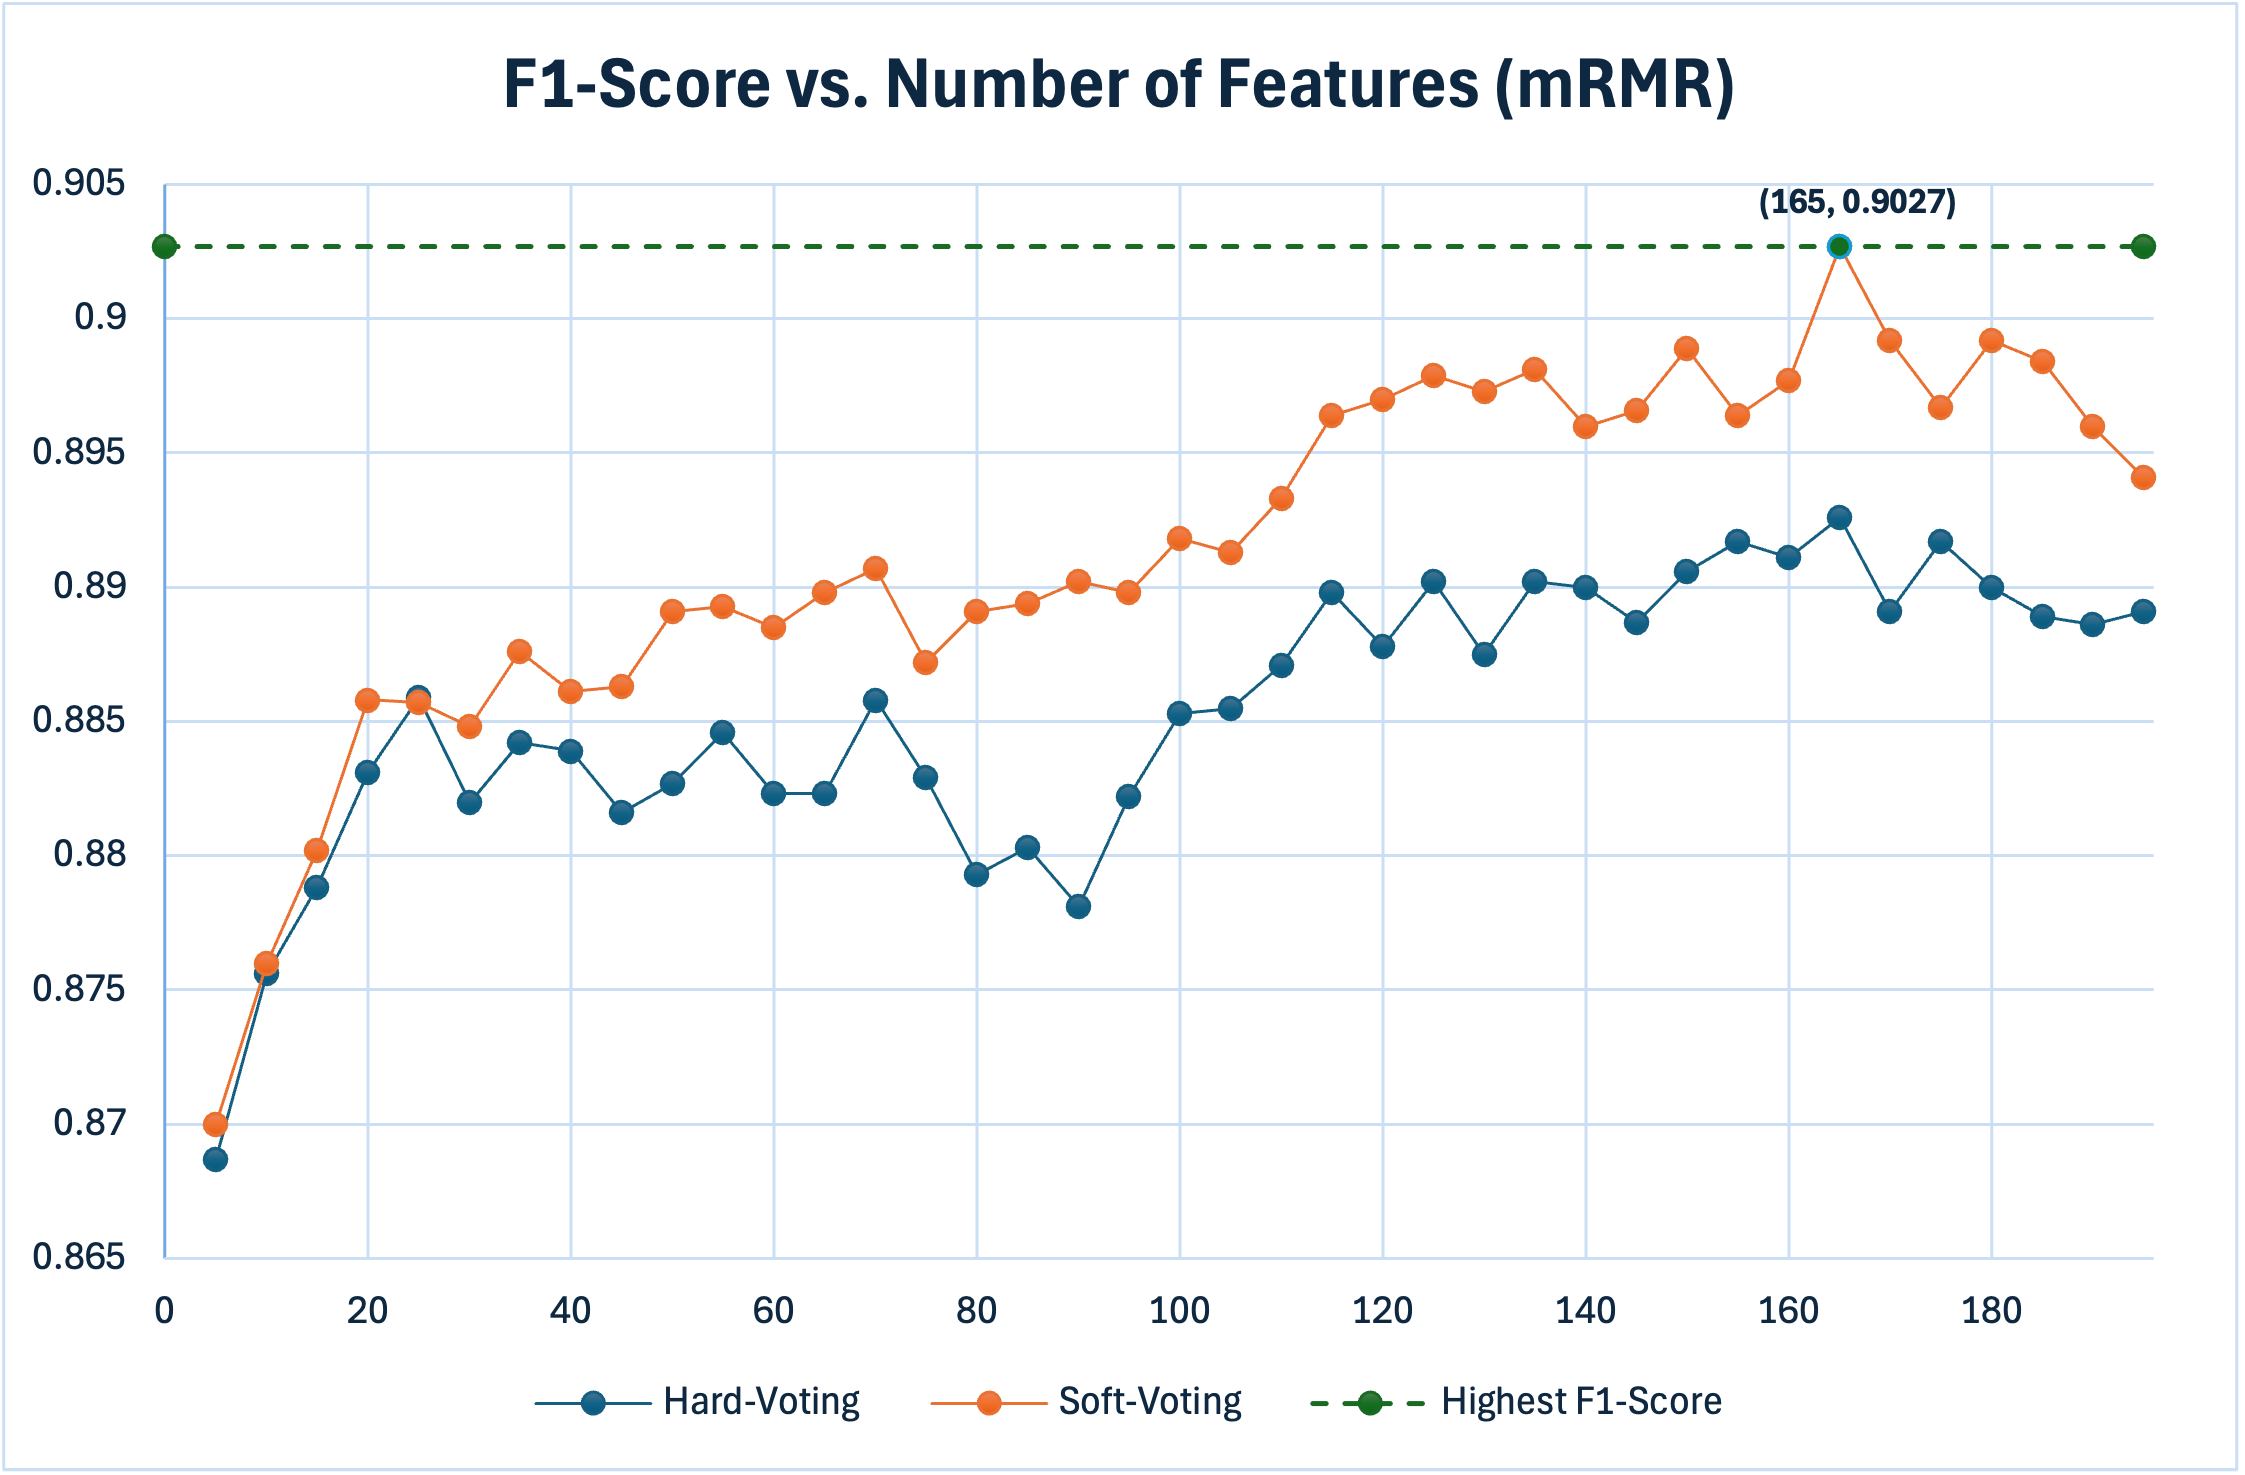

## **mRMR + Individual Models (Baseline)**

In [ ]:
models = {
    "Random Forest": RandomForestClassifier(n_estimators=200, max_depth = 20, max_features = 20, class_weight='balanced', random_state=42),
    "Logistic Regression": LogisticRegression(max_iter=10_000, class_weight='balanced', random_state=42),
    "Support Vector Machine": SVC(kernel='rbf', class_weight='balanced', random_state=42),
    "XGBoost Classifier": XGBClassifier(verbosity=0, scale_pos_weight=scale_pos_weight, random_state=42),
    "CatBoost Classifier": CatBoostClassifier(verbose=0, class_weights = class_weights, random_state=42)
}

y_true_all = {model_name: [] for model_name in models.keys()}
y_pred_all = {model_name: [] for model_name in models.keys()}

for model_name, model in models.items():
  scores_accuracy = []
  scores_precision = []
  scores_recall = []
  scores_f1 = []

  skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
  for train_index, test_index in skf.split(X, y):
          # Splitting data into training and testing sets
          X_train, X_test = X.loc[train_index, :], X.loc[test_index, :]
          y_train, y_test = y.iloc[train_index], y.iloc[test_index]

          # Scaling the input datasets
          scaler = StandardScaler()
          X_train = scaler.fit_transform(X_train)
          X_test = scaler.transform(X_test)

          # Training the model
          model.fit(X_train, y_train)

          if model_name == "Random Forest":
            # Predict probabilities for Random Forest
            y_prob = model.predict_proba(X_test)
            y_pred = (y_prob[:, 1] >= 0.24).astype(int)

          else:
              # Predicting on the test set
              y_pred = model.predict(X_test)

          # Append true and predicted labels for aggregation
          y_true_all[model_name].extend(y_test)
          y_pred_all[model_name].extend(y_pred)

          # print(f"Fold: {len(scores_accuracy) + 1}")
          # print("Confusion Matrix:")
          # print(confusion_matrix(y_test, y_pred))
          # print("\n")

          # Calculate metrics
          scores_accuracy.append(accuracy_score(y_test, y_pred))
          scores_precision.append(precision_score(y_test, y_pred, average='weighted'))
          scores_recall.append(recall_score(y_test, y_pred, average='weighted'))
          scores_f1.append(f1_score(y_test, y_pred, average='weighted'))

  # Print the results
  print(f"{model_name} Accuracy: {np.mean(scores_accuracy):.4f}")
  print(f"{model_name} Precision: {np.mean(scores_precision):.4f}")
  print(f"{model_name} Recall: {np.mean(scores_recall):.4f}")
  print(f"{model_name} F1-Score: {np.mean(scores_f1):.4f}")
  print("\n")

Random Forest Accuracy: 0.8987
Random Forest Precision: 0.8959
Random Forest Recall: 0.8987
Random Forest F1-Score: 0.8970


Logistic Regression Accuracy: 0.8008
Logistic Regression Precision: 0.8937
Logistic Regression Recall: 0.8008
Logistic Regression F1-Score: 0.8319


Support Vector Machine Accuracy: 0.8466
Support Vector Machine Precision: 0.8952
Support Vector Machine Recall: 0.8466
Support Vector Machine F1-Score: 0.8644


XGBoost Classifier Accuracy: 0.9081
XGBoost Classifier Precision: 0.8974
XGBoost Classifier Recall: 0.9081
XGBoost Classifier F1-Score: 0.8997


CatBoost Classifier Accuracy: 0.9045
CatBoost Classifier Precision: 0.9020
CatBoost Classifier Recall: 0.9045
CatBoost Classifier F1-Score: 0.9027




XGBoost and CatBoost clearly have better metrics than the other classifier models.

In [ ]:
for model_name, model in models.items():
  cm_aggregated = confusion_matrix(y_true_all[model_name], y_pred_all[model_name])
  print(f"{model_name} Confusion Matrix:\n", cm_aggregated)
  print("\n")

  # Calculate class-wise metrics
  classes = np.unique(y)  # List of unique class labels

  for i, class_label in enumerate(classes):
      TP = cm_aggregated[i, i]  # True positives for class i
      FP = cm_aggregated[:, i].sum() - TP  # False positives for class i
      FN = cm_aggregated[i, :].sum() - TP  # False negatives for class i

      # Calculate precision, recall, and F1 score for each class
      precision = TP / (TP + FP) if (TP + FP) != 0 else 0
      recall = TP / (TP + FN) if (TP + FN) != 0 else 0
      f1 = 2 * (precision * recall) / (precision + recall) if (precision + recall) != 0 else 0

      # Print the metrics for each class
      print(f"Class {class_label}:")
      print(f"  Precision: {precision:.4f}")
      print(f"  Recall: {recall:.4f}")
      print(f"  F1 Score: {f1:.4f}")
      print("-" * 40)
  print("\n")

Random Forest Confusion Matrix:
 [[3080  172]
 [ 197  195]]


Class 0:
  Precision: 0.9399
  Recall: 0.9471
  F1 Score: 0.9435
----------------------------------------
Class 1:
  Precision: 0.5313
  Recall: 0.4974
  F1 Score: 0.5138
----------------------------------------


Logistic Regression Confusion Matrix:
 [[2627  625]
 [ 101  291]]


Class 0:
  Precision: 0.9630
  Recall: 0.8078
  F1 Score: 0.8786
----------------------------------------
Class 1:
  Precision: 0.3177
  Recall: 0.7423
  F1 Score: 0.4450
----------------------------------------


Support Vector Machine Confusion Matrix:
 [[2820  432]
 [ 127  265]]


Class 0:
  Precision: 0.9569
  Recall: 0.8672
  F1 Score: 0.9098
----------------------------------------
Class 1:
  Precision: 0.3802
  Recall: 0.6760
  F1 Score: 0.4867
----------------------------------------


XGBoost Classifier Confusion Matrix:
 [[3146  106]
 [ 229  163]]


Class 0:
  Precision: 0.9321
  Recall: 0.9674
  F1 Score: 0.9494
-------------------------

## **ADASYN + mRMR + Ensemble**

In [43]:
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, VotingClassifier

# --- Setup ---
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Accumulators for all folds
all_y_true_hard, all_y_pred_hard = [], []
all_y_true_soft, all_y_pred_soft = [], []

# Loop over folds
for fold, (train_index, test_index) in enumerate(skf.split(X, y), 1):
    print(f"\n🧪 Fold {fold}")
    X_train, X_test = X.loc[train_index, :], X.loc[test_index, :]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    data_train = pd.DataFrame()
    data_train['target'] = y_train
    data_train = pd.concat([data_train, X_train], axis=1)

    data_train.columns = data_train.columns.astype(str)

    # Apply mRMR to select features
    selected_features = pymrmr.mRMR(data_train, 'MIQ', 165)

    X_train_selected = X_train[selected_features]
    X_test_selected = X_test[selected_features]

    # 1) ADASYN oversampling on training fold
    adasyn = ADASYN(random_state=42)
    X_res, y_res = adasyn.fit_resample(X_train_selected, y_train)

    # 2) Define your boosting models
    models = [
        ('xgb', XGBClassifier(random_state=42, eval_metric='mlogloss')),
        ('adb', AdaBoostClassifier(random_state=42)),
        ('gbc', GradientBoostingClassifier(random_state=42)),
        ('cat', CatBoostClassifier(verbose=0, random_state=42)),
    ]

    model_weights = [1.0, 1.0, 1.0, 1.0]

    # --- Soft Voting ---
    soft_clf = VotingClassifier(estimators=models, voting='soft', weights=model_weights)
    soft_clf.fit(X_res, y_res)
    soft_preds = soft_clf.predict(X_test_selected)

    # accumulate
    all_y_true_soft.extend(y_test)
    all_y_pred_soft.extend(soft_preds)

    print("🟣 Fold Soft Voting Report:")
    print(classification_report(y_test, soft_preds, zero_division=0))


🧪 Fold 1


 *** This program and the respective minimum Redundancy Maximum Relevance (mRMR) 
     algorithm were developed by Hanchuan Peng <hanchuan.peng@gmail.com>for
     the paper 
     "Feature selection based on mutual information: criteria of 
      max-dependency, max-relevance, and min-redundancy,"
      Hanchuan Peng, Fuhui Long, and Chris Ding, 
      IEEE Transactions on Pattern Analysis and Machine Intelligence,
      Vol. 27, No. 8, pp.1226-1238, 2005.


*** MaxRel features ***
Order 	 Fea 	 Name 	 Score
1 	 167 	 Clicks28 	 0.054
2 	 149 	 Clicks25 	 0.054
3 	 143 	 Clicks24 	 0.054
4 	 2 	 Nativelang 	 0.048
5 	 185 	 Clicks31 	 0.045
6 	 161 	 Clicks27 	 0.040
7 	 152 	 Score25 	 0.037
8 	 150 	 Hits25 	 0.037
9 	 119 	 Clicks20 	 0.034
10 	 168 	 Hits28 	 0.030
11 	 191 	 Clicks32 	 0.030
12 	 170 	 Score28 	 0.029
13 	 173 	 Clicks29 	 0.025
14 	 146 	 Score24 	 0.024
15 	 144 	 Hits24 	 0.024
16 	 134 	 Score22 	 0.022
17 	 132 	 Hits22 	 0.022
18 	 163 	 Misses27 

In [44]:
# --- Overall Metrics After All Folds ---
print("\n📊 Overall Soft Voting Metrics:")
print(f"Accuracy : {accuracy_score(all_y_true_soft, all_y_pred_soft):.4f}")
print(f"Precision: {precision_score(all_y_true_soft, all_y_pred_soft, average='weighted', zero_division=0):.4f}")
print(f"Recall   : {recall_score(all_y_true_soft, all_y_pred_soft, average='weighted'): .4f}")
print(f"F1-score : {f1_score(all_y_true_soft, all_y_pred_soft, average='weighted'): .4f}")
print("\nClass-wise:")
print(classification_report(all_y_true_soft, all_y_pred_soft, zero_division=0))


📊 Overall Soft Voting Metrics:
Accuracy : 0.9103
Precision: 0.8975
Recall   :  0.9103
F1-score :  0.8996

Class-wise:
              precision    recall  f1-score   support

           0       0.93      0.97      0.95      3252
           1       0.64      0.38      0.47       392

    accuracy                           0.91      3644
   macro avg       0.79      0.67      0.71      3644
weighted avg       0.90      0.91      0.90      3644



## **Ensemble + Model Weight Regressor**

In [ ]:
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, VotingClassifier

# --- Setup ---
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Accumulators for all folds
all_y_true_hard, all_y_pred_hard = [], []
all_y_true_soft, all_y_pred_soft = [], []

# Loop over folds
for fold, (train_index, test_index) in enumerate(skf.split(X, y), 1):
    print(f"\n🧪 Fold {fold}")
    X_train, X_test = X.loc[train_index, :], X.loc[test_index, :]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    data_train = pd.DataFrame()
    data_train['target'] = y_train
    data_train = pd.concat([data_train, X_train], axis=1)

    data_train.columns = data_train.columns.astype(str)

    # Apply mRMR to select features
    selected_features = pymrmr.mRMR(data_train, 'MIQ', 165)

    X_train_selected = X_train[selected_features]
    X_test_selected = X_test[selected_features]

    # 1) ADASYN oversampling on training fold
    adasyn = ADASYN(random_state=42)
    X_res, y_res = adasyn.fit_resample(X_train_selected, y_train)

    # 2) Define your boosting models
    models = [
        ('xgb', XGBClassifier(random_state=42, eval_metric='mlogloss')),
        ('adb', AdaBoostClassifier(random_state=42)),
        ('gbc', GradientBoostingClassifier(random_state=42)),
        ('cat', CatBoostClassifier(verbose=0, random_state=42)),
    ]

    model_weights = [1.0, 1.0, 1.0, 1.0]

    # --- Soft Voting ---
    soft_clf = VotingClassifier(estimators=models, voting='soft', weights=model_weights)
    soft_clf.fit(X_res, y_res)
    soft_preds = soft_clf.predict(X_test_selected)

    # accumulate
    all_y_true_soft.extend(y_test)
    all_y_pred_soft.extend(soft_preds)

    print("🟣 Fold Soft Voting Report:")
    print(classification_report(y_test, soft_preds, zero_division=0))


🧪 Fold 1


 *** This program and the respective minimum Redundancy Maximum Relevance (mRMR) 
     algorithm were developed by Hanchuan Peng <hanchuan.peng@gmail.com>for
     the paper 
     "Feature selection based on mutual information: criteria of 
      max-dependency, max-relevance, and min-redundancy,"
      Hanchuan Peng, Fuhui Long, and Chris Ding, 
      IEEE Transactions on Pattern Analysis and Machine Intelligence,
      Vol. 27, No. 8, pp.1226-1238, 2005.


*** MaxRel features ***
Order 	 Fea 	 Name 	 Score
1 	 167 	 Clicks28 	 0.054
2 	 149 	 Clicks25 	 0.054
3 	 143 	 Clicks24 	 0.054
4 	 2 	 Nativelang 	 0.048
5 	 185 	 Clicks31 	 0.045
6 	 161 	 Clicks27 	 0.040
7 	 152 	 Score25 	 0.037
8 	 150 	 Hits25 	 0.037
9 	 119 	 Clicks20 	 0.034
10 	 168 	 Hits28 	 0.030
11 	 191 	 Clicks32 	 0.030
12 	 170 	 Score28 	 0.029
13 	 173 	 Clicks29 	 0.025
14 	 146 	 Score24 	 0.024
15 	 144 	 Hits24 	 0.024
16 	 134 	 Score22 	 0.022
17 	 132 	 Hits22 	 0.022
18 	 163 	 Misses27 

In [ ]:
# --- Overall Metrics After All Folds ---
print("\n📊 Overall Soft Voting Metrics:")
print(f"Accuracy : {accuracy_score(all_y_true_soft, all_y_pred_soft):.4f}")
print(f"Precision: {precision_score(all_y_true_soft, all_y_pred_soft, average='weighted', zero_division=0):.4f}")
print(f"Recall   : {recall_score(all_y_true_soft, all_y_pred_soft, average='weighted'): .4f}")
print(f"F1-score : {f1_score(all_y_true_soft, all_y_pred_soft, average='weighted'): .4f}")
print("\nClass-wise:")
print(classification_report(all_y_true_soft, all_y_pred_soft, zero_division=0))


📊 Overall Soft Voting Metrics:
Accuracy : 0.9103
Precision: 0.8975
Recall   :  0.9103
F1-score :  0.8996

Class-wise:
              precision    recall  f1-score   support

           0       0.93      0.97      0.95      3252
           1       0.64      0.38      0.47       392

    accuracy                           0.91      3644
   macro avg       0.79      0.67      0.71      3644
weighted avg       0.90      0.91      0.90      3644

